<a href="https://colab.research.google.com/github/Muhammad-kaif2/machine_learning/blob/main/Function_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
Url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day30-function-transformer/train.csv'
df = pd.read_csv(Url, usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
df.fillna(df['Age'].mean(), inplace=True)

In [ ]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [ ]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/tmp/ipython-input-552272965.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

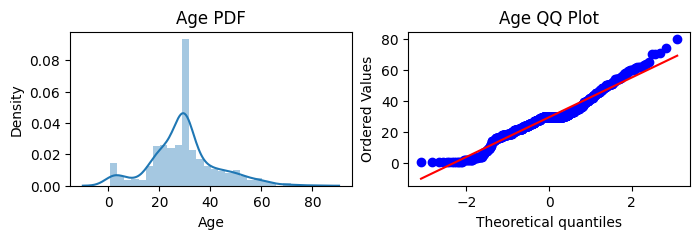

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 2))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

/tmp/ipython-input-2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


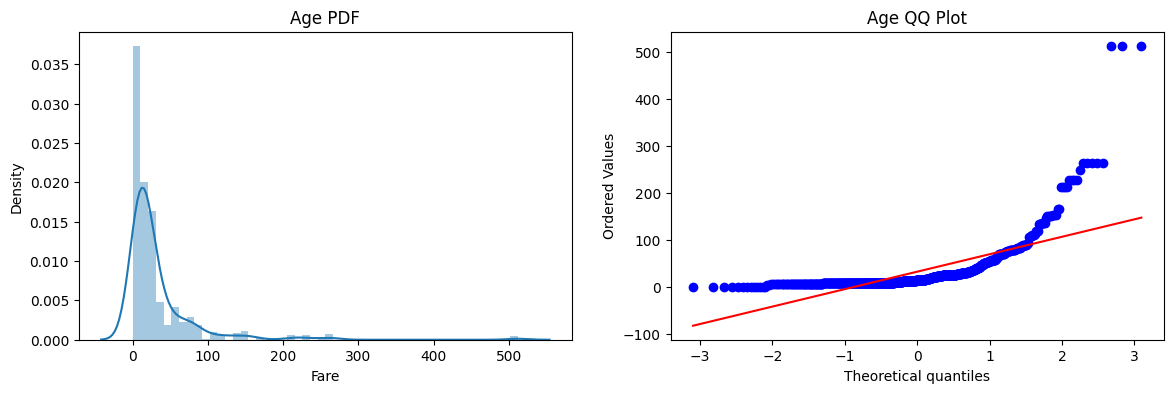

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)
clf2.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [ ]:
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


In [ ]:
fct = FunctionTransformer(func=np.log1p)
x_train_transformed = fct.fit_transform(X_train)
x_test_transformed = fct.transform(X_test)

In [ ]:
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed,y_train)
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

In [ ]:
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [ ]:
X_tranformer = fct.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR",cross_val_score(clf, X_tranformer, y, cv=10, scoring='accuracy').mean())
print("DT",cross_val_score(clf2, X_tranformer, y, cv=10, scoring='accuracy').mean())

LR 0.678027465667915
DT 0.6577153558052435


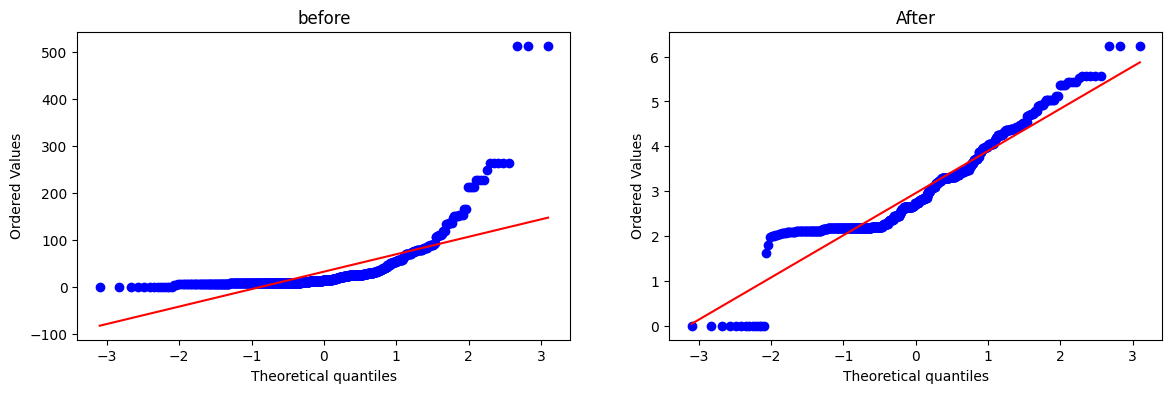

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm", plot=plt)
plt.title('before')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('After')

plt.show()

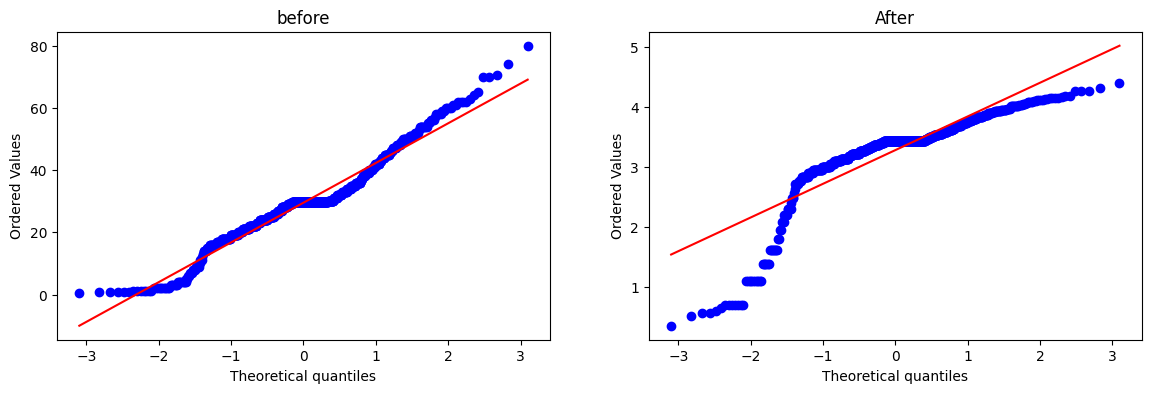

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm", plot=plt)
plt.title('before')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('After')

plt.show()

In [ ]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),[1])],remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [ ]:
X_tranformer2 = trf2.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print(np.mean(cross_val_score(clf, X_tranformer2, y, cv=10, scoring='accuracy')))
print(np.mean(cross_val_score(clf2, X_tranformer2, y, cv=10, scoring='accuracy')))

0.6712609238451936
0.6644444444444444


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def apply_trans(transform):
  x = df.iloc[:,1:3]
  y = df.iloc[:,0]
  trf2 = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
  X_tranformer2 = trf2.fit_transform(x)
  clf = LogisticRegression()
  print(np.mean(cross_val_score(clf, X_tranformer2, y, cv=10, scoring='accuracy')))
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(x['Fare'], dist="norm", plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(X_tranformer2[:,0], dist="norm", plot=plt)
  plt.title('Fare After Transform')

  plt.show()

0.6262796504369538


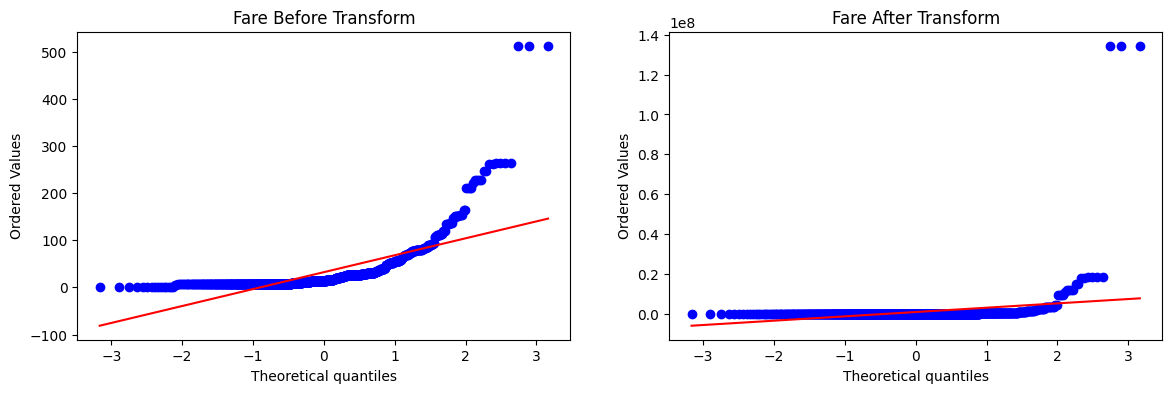

In [ ]:
apply_trans(lambda x: x**3)